In [1]:
import gensim, logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(u'grayscale')
plt.style.available
%matplotlib inline  


## word2vec 기본

---
### 샘플 문자 생성 및 학습

In [26]:
sentences = [['baseball','lg'], [ 'baseball','nc'], ['ss','baseball']]
# vector dimention : 2
def myhashfxn(obj):
    return hash(obj)%(2**32)
model = gensim.models.Word2Vec(sentences, min_count=1,size=2, window=2, hashfxn=myhashfxn)

In [27]:
## 학습된 단어의 vector값 접근
model['lg']

array([-0.24028118, -0.2371475 ], dtype=float32)

In [28]:
## 학습된 백터들
model.index2word

['baseball', 'ss', 'lg', 'nc']

In [29]:
for word in model.index2word:
    print( word, model[word] )

('baseball', array([-0.05881821, -0.11933587], dtype=float32))
('ss', array([-0.13293731,  0.22517031], dtype=float32))
('lg', array([-0.24028118, -0.2371475 ], dtype=float32))
('nc', array([ 0.23890798,  0.00086867], dtype=float32))


## 화면에 출력

In [30]:
def drawPlot(v, x, y):
    v.plot(kind='scatter', x=x,y=y, figsize=(5,5))
    for idx, pos in v.iterrows():
        plt.text(pos[x], pos[y], idx )
       
def draw3DPlot(v, x, y, z):
    fig = plt.figure(figsize=(8,8))
    threedee = fig.gca(projection='3d')
    threedee.scatter(v[x], v[y],v[z] )
    for idx, pos in v.iterrows():
        threedee.text(pos[x], pos[y],pos[z],  idx )

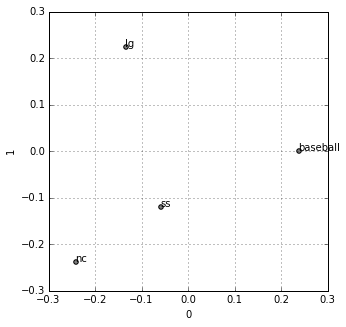

In [31]:
v = pd.DataFrame(model.syn0, index=model.vocab)
drawPlot(v, 0, 1)

In [8]:
sentences = [['lg', 'baseball'], ['nc', 'baseball'], ['ss','baseball'], 
             ['lg','player','lee','good'],[ 'lg','player','ckm'],[ 'lg','player','jeehwan'], 
             ['ss','player','nbr'],[ 'ss','player','ajm'],[ 'ss','player','chw']             ]
# vector dimention : 2
model = gensim.models.Word2Vec(sentences, min_count=1,size=3, window=2)

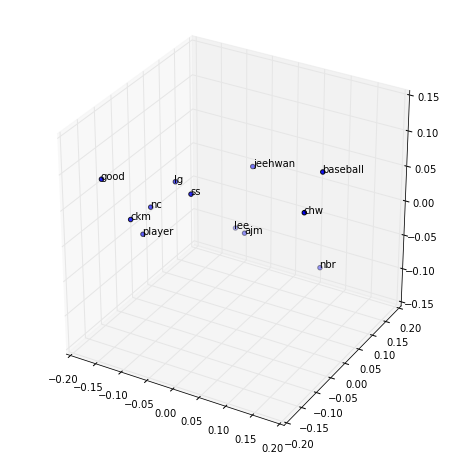

In [9]:
v = pd.DataFrame(model.syn0, index=model.vocab)
draw3DPlot(v, 0, 1, 2)
#drawPlot(v, 0, 1)

---
## 학습된 모델 사용 
* 구글 뉴스로 트레이닝된 모델 사용 ( 100B words, 3M vector words, 300-Dimentions ) 
 * https://code.google.com/p/word2vec/#Pre-trained_word_and_phrase_vectors

In [10]:
gn_model = gensim.models.Word2Vec.load_word2vec_format('/Users/goodvc/Documents/data-analytics/google-news-word2vec-model/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
gn_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

In [ ]:
gn_model.doesnt_match("breakfast cereal dinner lunch".split())

In [12]:
gn_model.similarity('woman', 'man')

0.76640122309953529

In [13]:
gn_model['computer'][:10]

array([ 0.10742188, -0.20117188,  0.12304688,  0.21191406, -0.09130859,
        0.21679688, -0.13183594,  0.08300781,  0.20214844,  0.04785156], dtype=float32)

---
## 모델의 저장과 불러오기 
### gensim standard format SAVE/LOAD

In [ ]:
model.save('./resource/test.model')

In [11]:
test_model = gensim.models.Word2Vec.load('./resource/test.model')
test_model['lg']

array([-0.10241802, -0.01985146, -0.1217079 ], dtype=float32)

### original word2vec( written c ) format SAVE/LOAD

In [12]:
model.save_word2vec_format('./resource/test.bin', binary=True)

In [13]:
test_model = gensim.models.Word2Vec.load_word2vec_format('./resource/test.bin', binary=True)
test_model['lg']

array([-0.63891149, -0.12383879, -0.75924706], dtype=float32)